In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
xx = np.array([-0.51, 51.2])
yy = np.array([0.33, 51.6])
means = [xx.mean(), yy.mean()]
stds = [xx.std() / 3, yy.std() / 3]
''' Dividing by 3 could be used to bring the data closer to a standard range under the assumption that most of the data falls
within 3 standard deviations of the mean in a normal distribution (empirical rule).
Dividing by a smaller number (e.g., 2) makes the spread larger, potentially exaggerating differences in feature importance.
Dividing by a larger number (e.g., 5) compresses the spread, potentially hiding differences in feature importance.'''

corr = 0.8         # correlation

covs = [[stds[0]**2          , stds[0]*stds[1]*corr],
        [stds[0]*stds[1]*corr,           stds[1]**2]]

m = np.random.multivariate_normal(means, covs, 1000).T

In [ ]:
df=pd.DataFrame()

In [ ]:
df['exp(in months)']=m[0]
df['salary(in thousands)']=m[1]

In [ ]:
df.head()

,exp(in months),salary(in thousands)
0,8.751910,7.684960
1,21.449313,24.474801
2,31.329415,29.439531
3,14.016995,12.962641
4,32.819984,31.923227


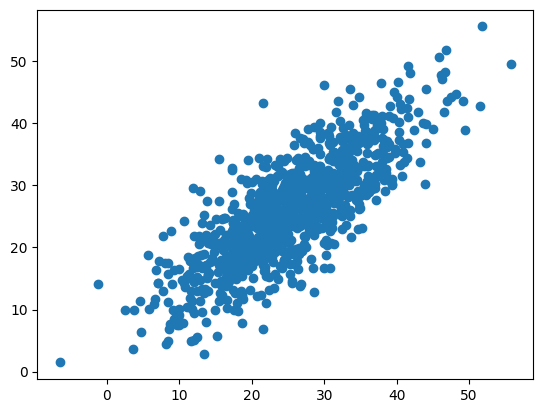

In [ ]:
plt.scatter(df['exp(in months)'],df['salary(in thousands)'])

In [ ]:
X=df.iloc[:,0:1].values
y=df.iloc[:,1].values

In [ ]:
# print(X)
# print("/n ******************** /n")
# print(y)
# print("/n ******************** /n")
print(X.shape)
print(y.shape)

#we can understand shape by the following example:

# import pandas as pd
# data = [[50, True], [40, False], [30, False]]
# df = pd.DataFrame(data)
# print(df.iloc[:,:].values)
# print("\n\n")
# print(df.iloc[:,:].values.shape)
# print("\n\n")

# print(df.iloc[:,0:1].values)
# print("\n\n")
# print(df.iloc[:,0:1].values.shape)
# print("\n\n")

# print(df.iloc[:,1].values)
# print("\n\n")
# print(df.iloc[:,1].values.shape)

(1000, 1)
(1000,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 1)
(200, 1)
(800,)
(200,)


In [ ]:
from sklearn.linear_model import LinearRegression
# created regressor as object of linear regression class
regressor=LinearRegression()

In [ ]:
# train our model
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
# for every value of x, i have calculated predicted y value i.e. y^
y_pred=regressor.predict(X_test)

In [ ]:
# when we train our model, automatically the line is drawn so we can fetch the slope & intercept as follows

# Finding the Coefs and intercept

# Equation of line is given by y=mx+b
# y=0.81*x + 5.50
# m ---> slope
# b ---> intercept

# X coefficient
print(regressor.coef_[0])

# Y intercept
print(regressor.intercept_)

# so our line here is y=0.78x + 5.93

0.7869478809698128
5.934960837289317


In [ ]:
df_error=pd.DataFrame()
df_error['y_test']=y_test
df_error['y_pred']=y_pred
# df_error.head()
df_error.shape

(200, 2)

In [ ]:
df_error

,y_test,y_pred
0,30.909418,34.253406
1,23.710829,27.824779
2,30.461115,27.902563
3,27.621725,22.615571
4,30.622823,24.111366
...,...,...
195,19.680766,23.381478
196,14.246856,11.529846
197,31.332970,32.737589
198,28.321864,31.130624


In [ ]:
# Mean Absolute Error

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

4.1245907232893675

In [ ]:
# Mean Squared Error

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

26.356931039938317

In [ ]:
# Root Mean Squared Error
mse=mean_squared_error(y_test,y_pred)

np.sqrt(mse)

5.133900178221069

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6306325435417754

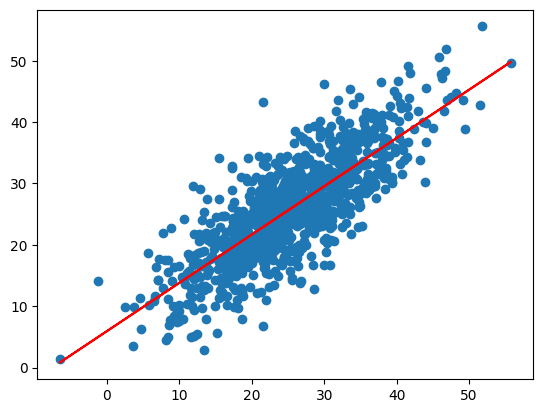

In [ ]:
# Visualising the regression line
plt.plot(X_train,regressor.predict(X_train), color='red')
plt.scatter(df['exp(in months)'],df['salary(in thousands)'])